# **Problem Set 4**

## Q1. Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup? (4pts)

The dataset I have chosen is the "Marketing Campaign" dataset from Kaggle. It provides an interesting marketing problem, which is to predict whether a customer will respond to a marketing campaign and make a purchase or not. The dataset includes features such as age, income, education, marital status, etc along with the response variable, which is whether the customer responded to the marketing campaign or not. There are 2240 rows and 29 columns in this dataset.

I chose this dataset becauase it provides a good opportunity to explore and apply different machine learning techniques for classification problems, such as decision trees, random forests, and gradient boosting. Additionally, the dataset includes a mix of categorical and numerical features, which adds another layer of complexity to the analysis.

This dataset is from an unknown year and was collected using an unknown methodology. As you read this write-up, it's important to note that while this dataset provides an interesting marketing problem, it's unclear how it was collected and the variables may not be representative of the larger population. Additionally, the dataset does not have a large sample size, which may limit the generalizability of any findings.

## Q2. Define a research question. What are you trying to predict? Describe what you're trying to accomplish (it will differ between Supervised and Unsupervised learning). (4pts)

Research Question: With this dataset, my aim is to try and predict whether a customer will respond positively to a marketing campaign based on various features such as their demographics and behavioral attributes. Along with this, I wish to understand which features are most important for a successful campaign.

Since this response variable can take only 2 values (0 and 1), this problem is a classification problem. In this assignment, I will develop and train a decision tree model which will make the above prediction. I have made certain variations in my model's parameters as I progress, to determine which parameters are the most suitable for the aforementioned problem set. 

The ultimate use of this analysis would be to identify the most effective marketing strategies for a given target audience, in order to optimize the success of future campaigns. Although, we don't have information on the marketing campaigns, the features AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2 indicates which marketing strategy/strategies was effective on which customer. 

## Q3. Why is this algorithm a good way of answering your research question?

Decision tree is a good algorithm for answering this question because it can easily handle both categorical and numerical data, which are present in the marketing campaign dataset. Additionally, decision trees are easy to interpret and explain, which is important when analyzing marketing campaigns. Decision tree also has the ability to identify important features that contribute most to the target variable, which can be helpful in identifying key factors that influence the success of a marketing campaign.

## Q4. Using the data you chose and the algorithm you chose, read in your data and run your model.

## Q5. Using the data you chose and the algorithm you chose, read in your data and run your model.

## Q6. Tinker with parameters at least 3 times

## Q7. Report the accuracy of your model.

## Q8. Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what's being shown in your visualization.

### Importing libraries and loading the dataset

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
# Loading dataset
marketing_campaign_df = pd.read_csv("marketing_campaign.csv", sep='\t')

### Perform Exploratory Data Analysis

In [22]:
marketing_campaign_df['Age'] = 2023 - marketing_campaign_df['Year_Birth']

In [23]:
marketing_campaign_df.head(5) 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42


In [24]:
marketing_campaign_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


In [25]:
marketing_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [26]:
#Checking for null values
marketing_campaign_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [27]:
#Removing null values from the dataset
#filter = marketing_campaign_df.loc[marketing_campaign_df['Marital_Status']==Null]
#filter
marketing_campaign_df[pd.isnull(marketing_campaign_df).any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,0,0,0,0,0,3,11,0,40
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,0,0,0,0,3,11,0,37
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,0,0,0,0,0,0,3,11,0,64
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,0,0,0,0,0,0,3,11,0,72
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,0,0,0,0,0,3,11,0,41
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,0,0,0,0,0,3,11,0,50
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,0,0,0,0,0,0,3,11,0,66
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,0,0,0,0,0,3,11,0,66
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,0,0,0,0,0,0,3,11,0,50
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,0,0,0,0,0,0,3,11,0,62


In [28]:
# Since income is an important feature in customer segmentation 
# some customers spend more or prefer luxurious products because their income is high and they can afford it 
# I will be deleting all rows having null values

marketing_campaign_df = marketing_campaign_df.dropna()

#Checking for null values
marketing_campaign_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [102]:
# As we can see, there is major imbalance in our dataset which can affect the accuracy of our results. Thus, we will have to take this into consideration when developing a ML model. 
marketing_campaign_df['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

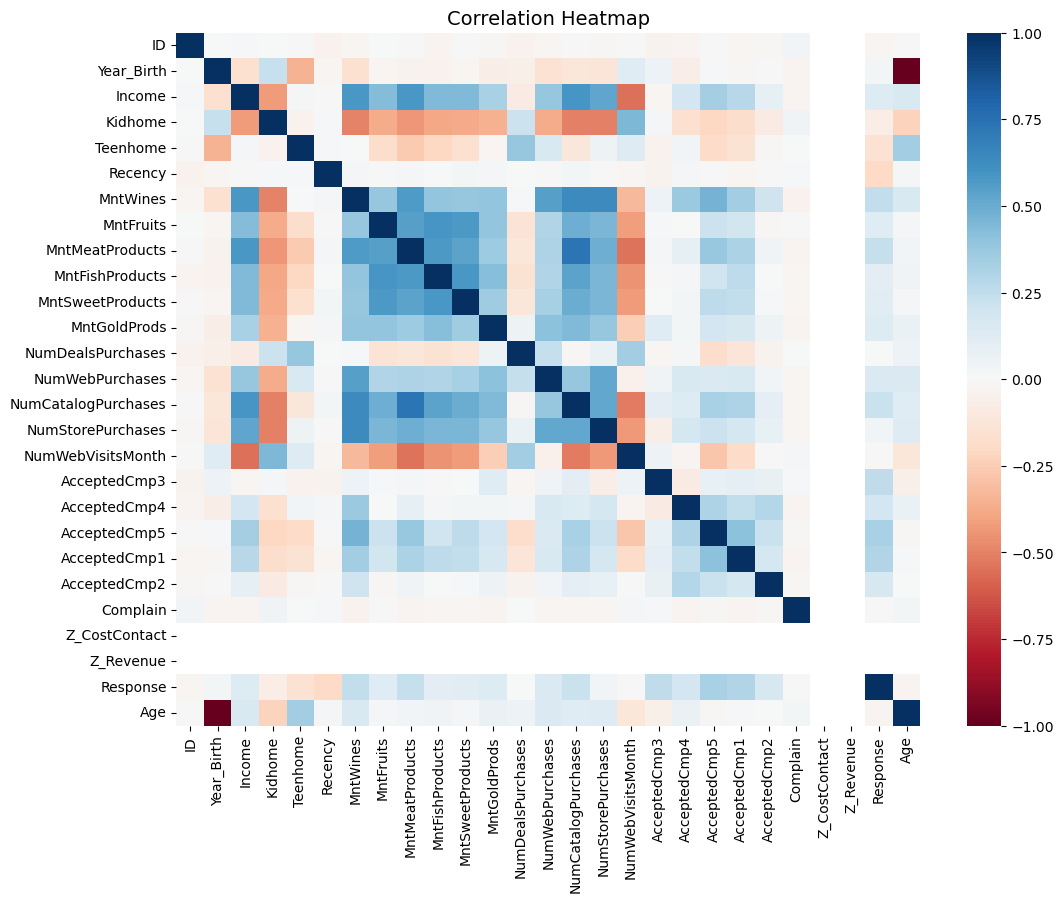

In [29]:
#Checking correlation between variables
plt.figure(figsize=(12,9))
sns.heatmap(marketing_campaign_df.corr(),cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [30]:
# get_dummies function to one-hot encode categorical variables
marketing_campaign_df = pd.get_dummies(marketing_campaign_df) 

### Perform Decision Tree

In [56]:
#Split dataset in features and target variable
X = marketing_campaign_df.drop(['Response'], axis=1)
y = marketing_campaign_df.Response

#feature_cols = marketing_campaign_df.drop(['Response'], axis=1)
#X = feature_cols # Features
#y = marketing_campaign_df['Response'] # Target variable

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create Decision Tree classifer object
clf_default = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_default = clf_default.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_default = clf_default.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_default))
accuracy_default = metrics.accuracy_score(y_test, y_pred_default)*100
print("Accuracy:", accuracy_default)
confusion_matrix(y_test,y_pred_default)


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       385
           1       0.49      0.49      0.49        59

    accuracy                           0.86       444
   macro avg       0.71      0.71      0.71       444
weighted avg       0.86      0.86      0.86       444

Accuracy: 86.48648648648648


array([[355,  30],
       [ 30,  29]])

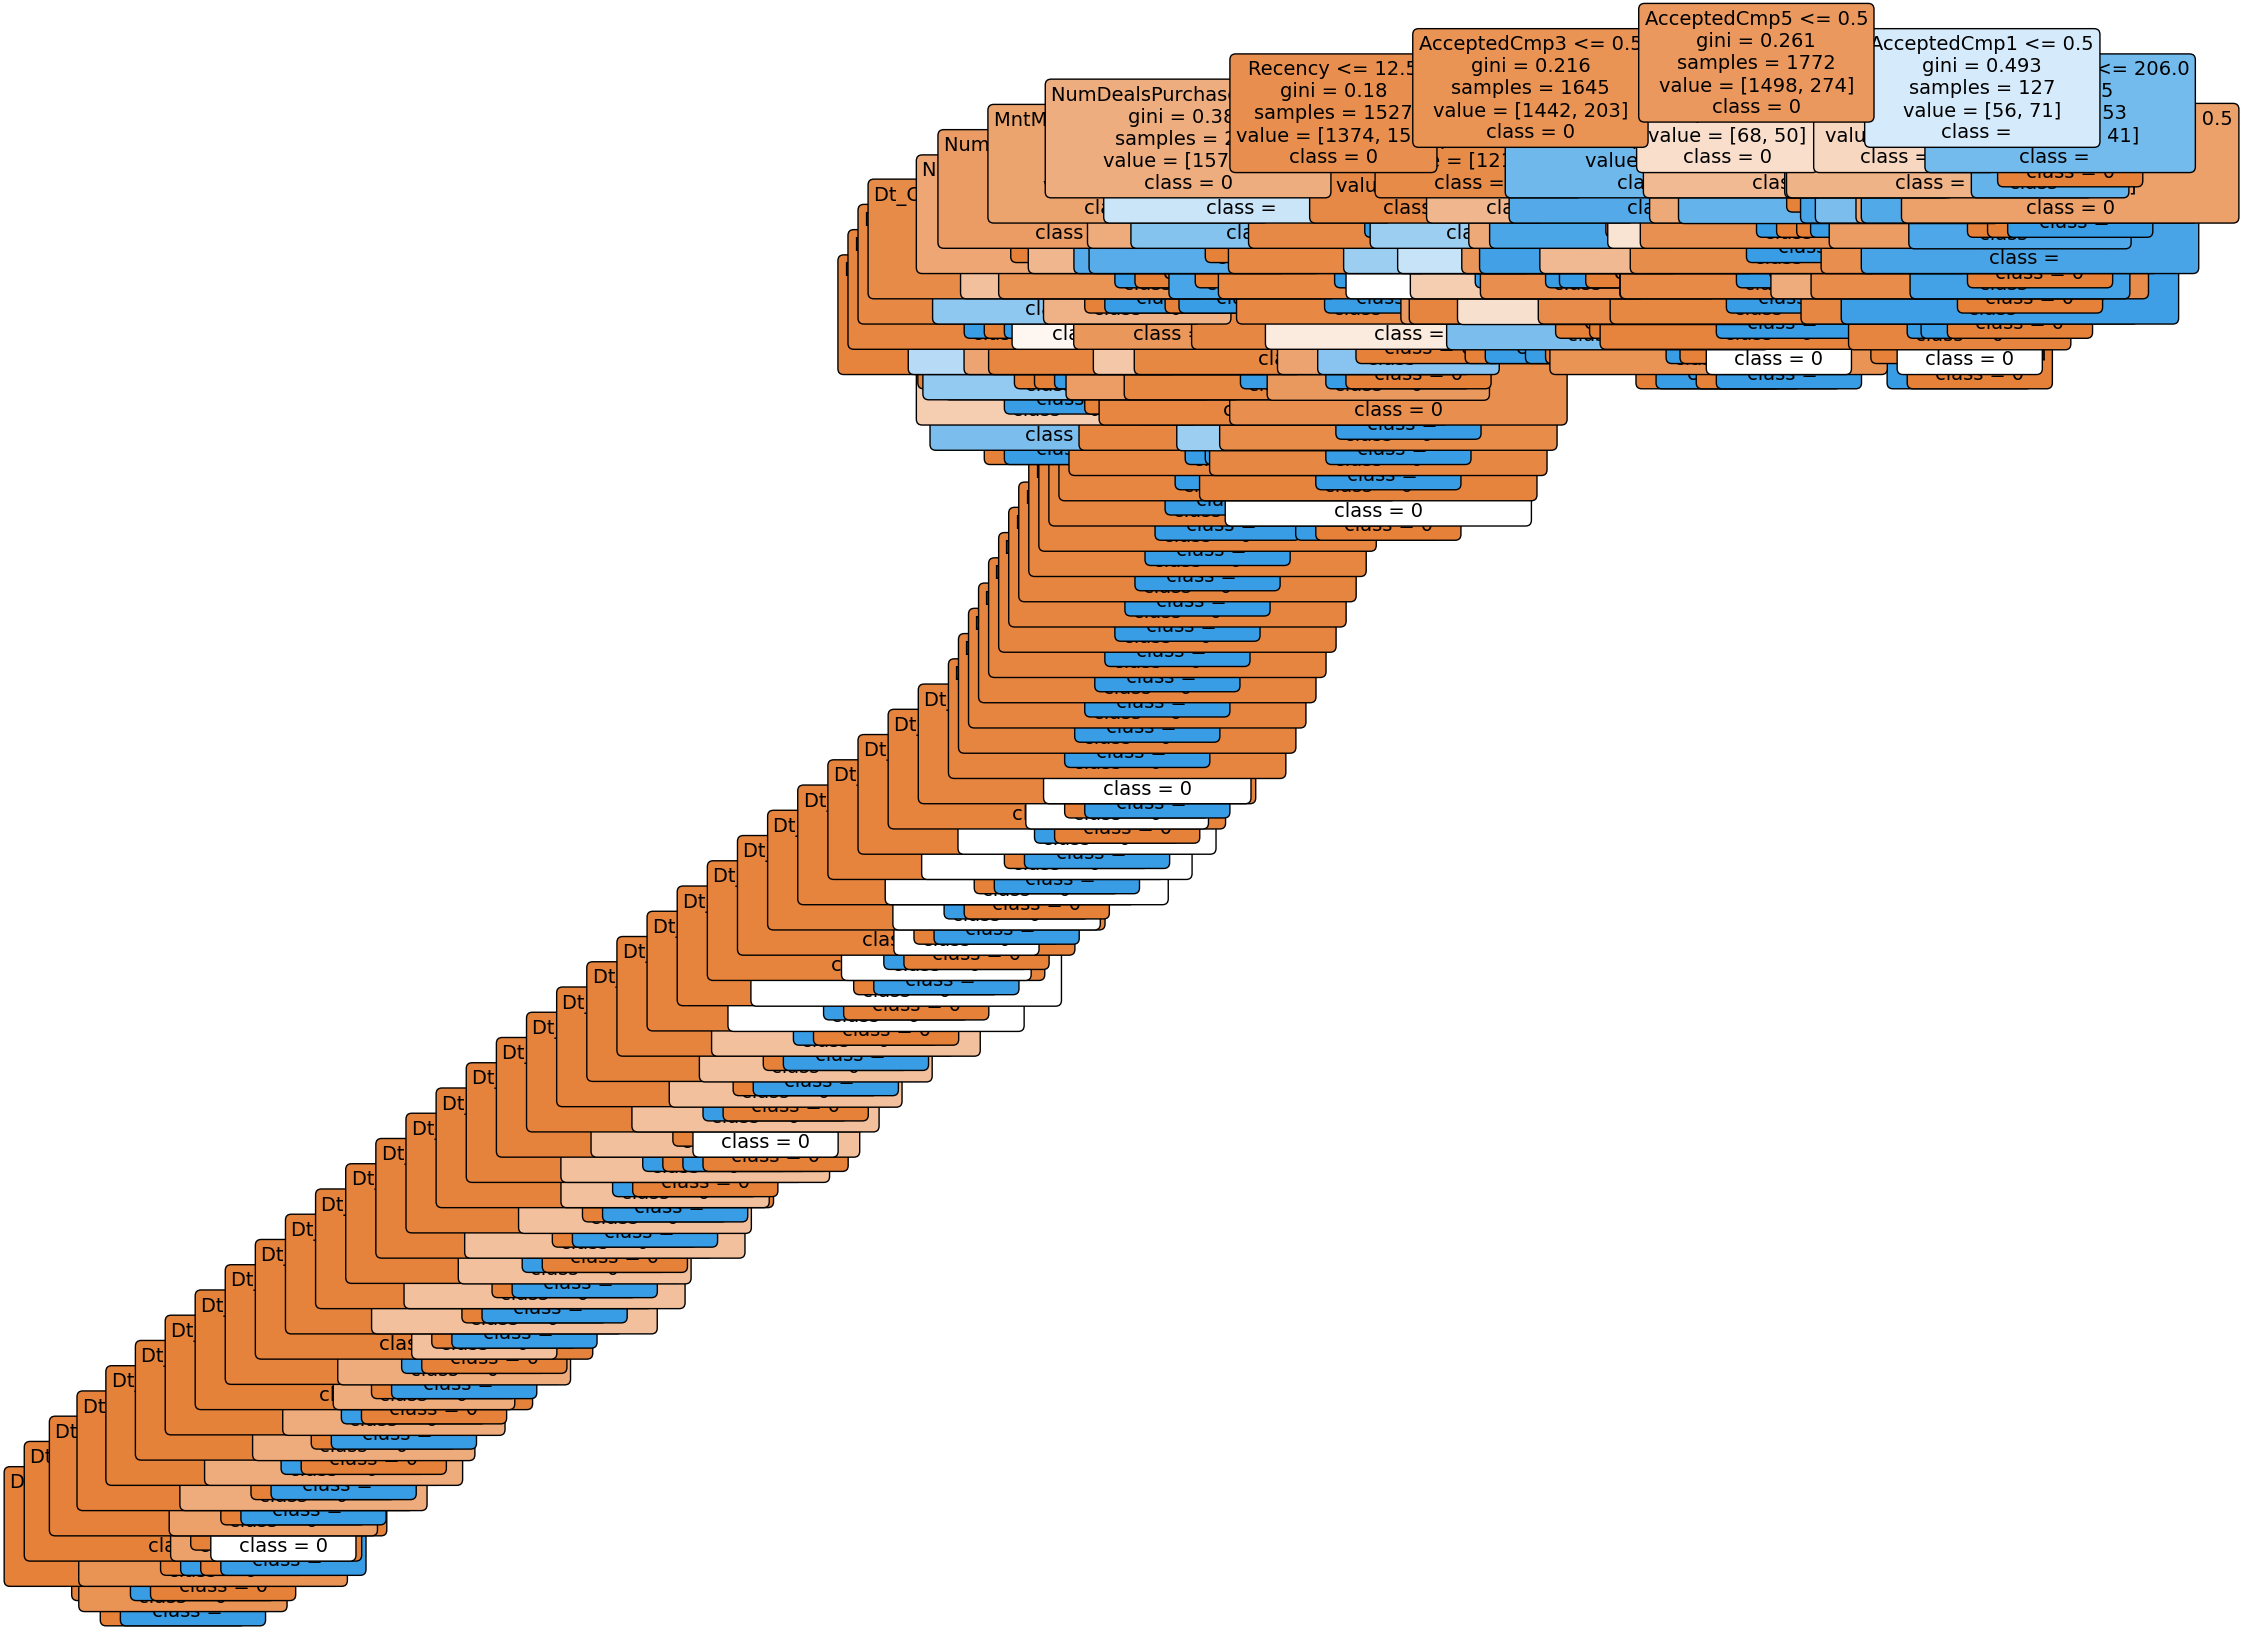

In [92]:
# Visualizing the decision tree
feature_names = marketing_campaign_df.columns[2:28]
target_names = marketing_campaign_df['Response']

fig1 = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_default,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)

## Tinker with Parameters

### Changing class weight parameter of decision tree

In [57]:
# Create Decision Tree classifer object
clf_cw = DecisionTreeClassifier(class_weight = 'balanced')

# Train Decision Tree Classifer
clf_cw = clf_cw.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_cw = clf_cw.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_cw))
accuracy_cw = metrics.accuracy_score(y_test, y_pred_cw)*100
print("Accuracy:",accuracy_cw)
confusion_matrix(y_test,y_pred_cw)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       385
           1       0.39      0.47      0.43        59

    accuracy                           0.83       444
   macro avg       0.66      0.68      0.67       444
weighted avg       0.85      0.83      0.84       444

Accuracy: 83.33333333333334


array([[342,  43],
       [ 31,  28]])

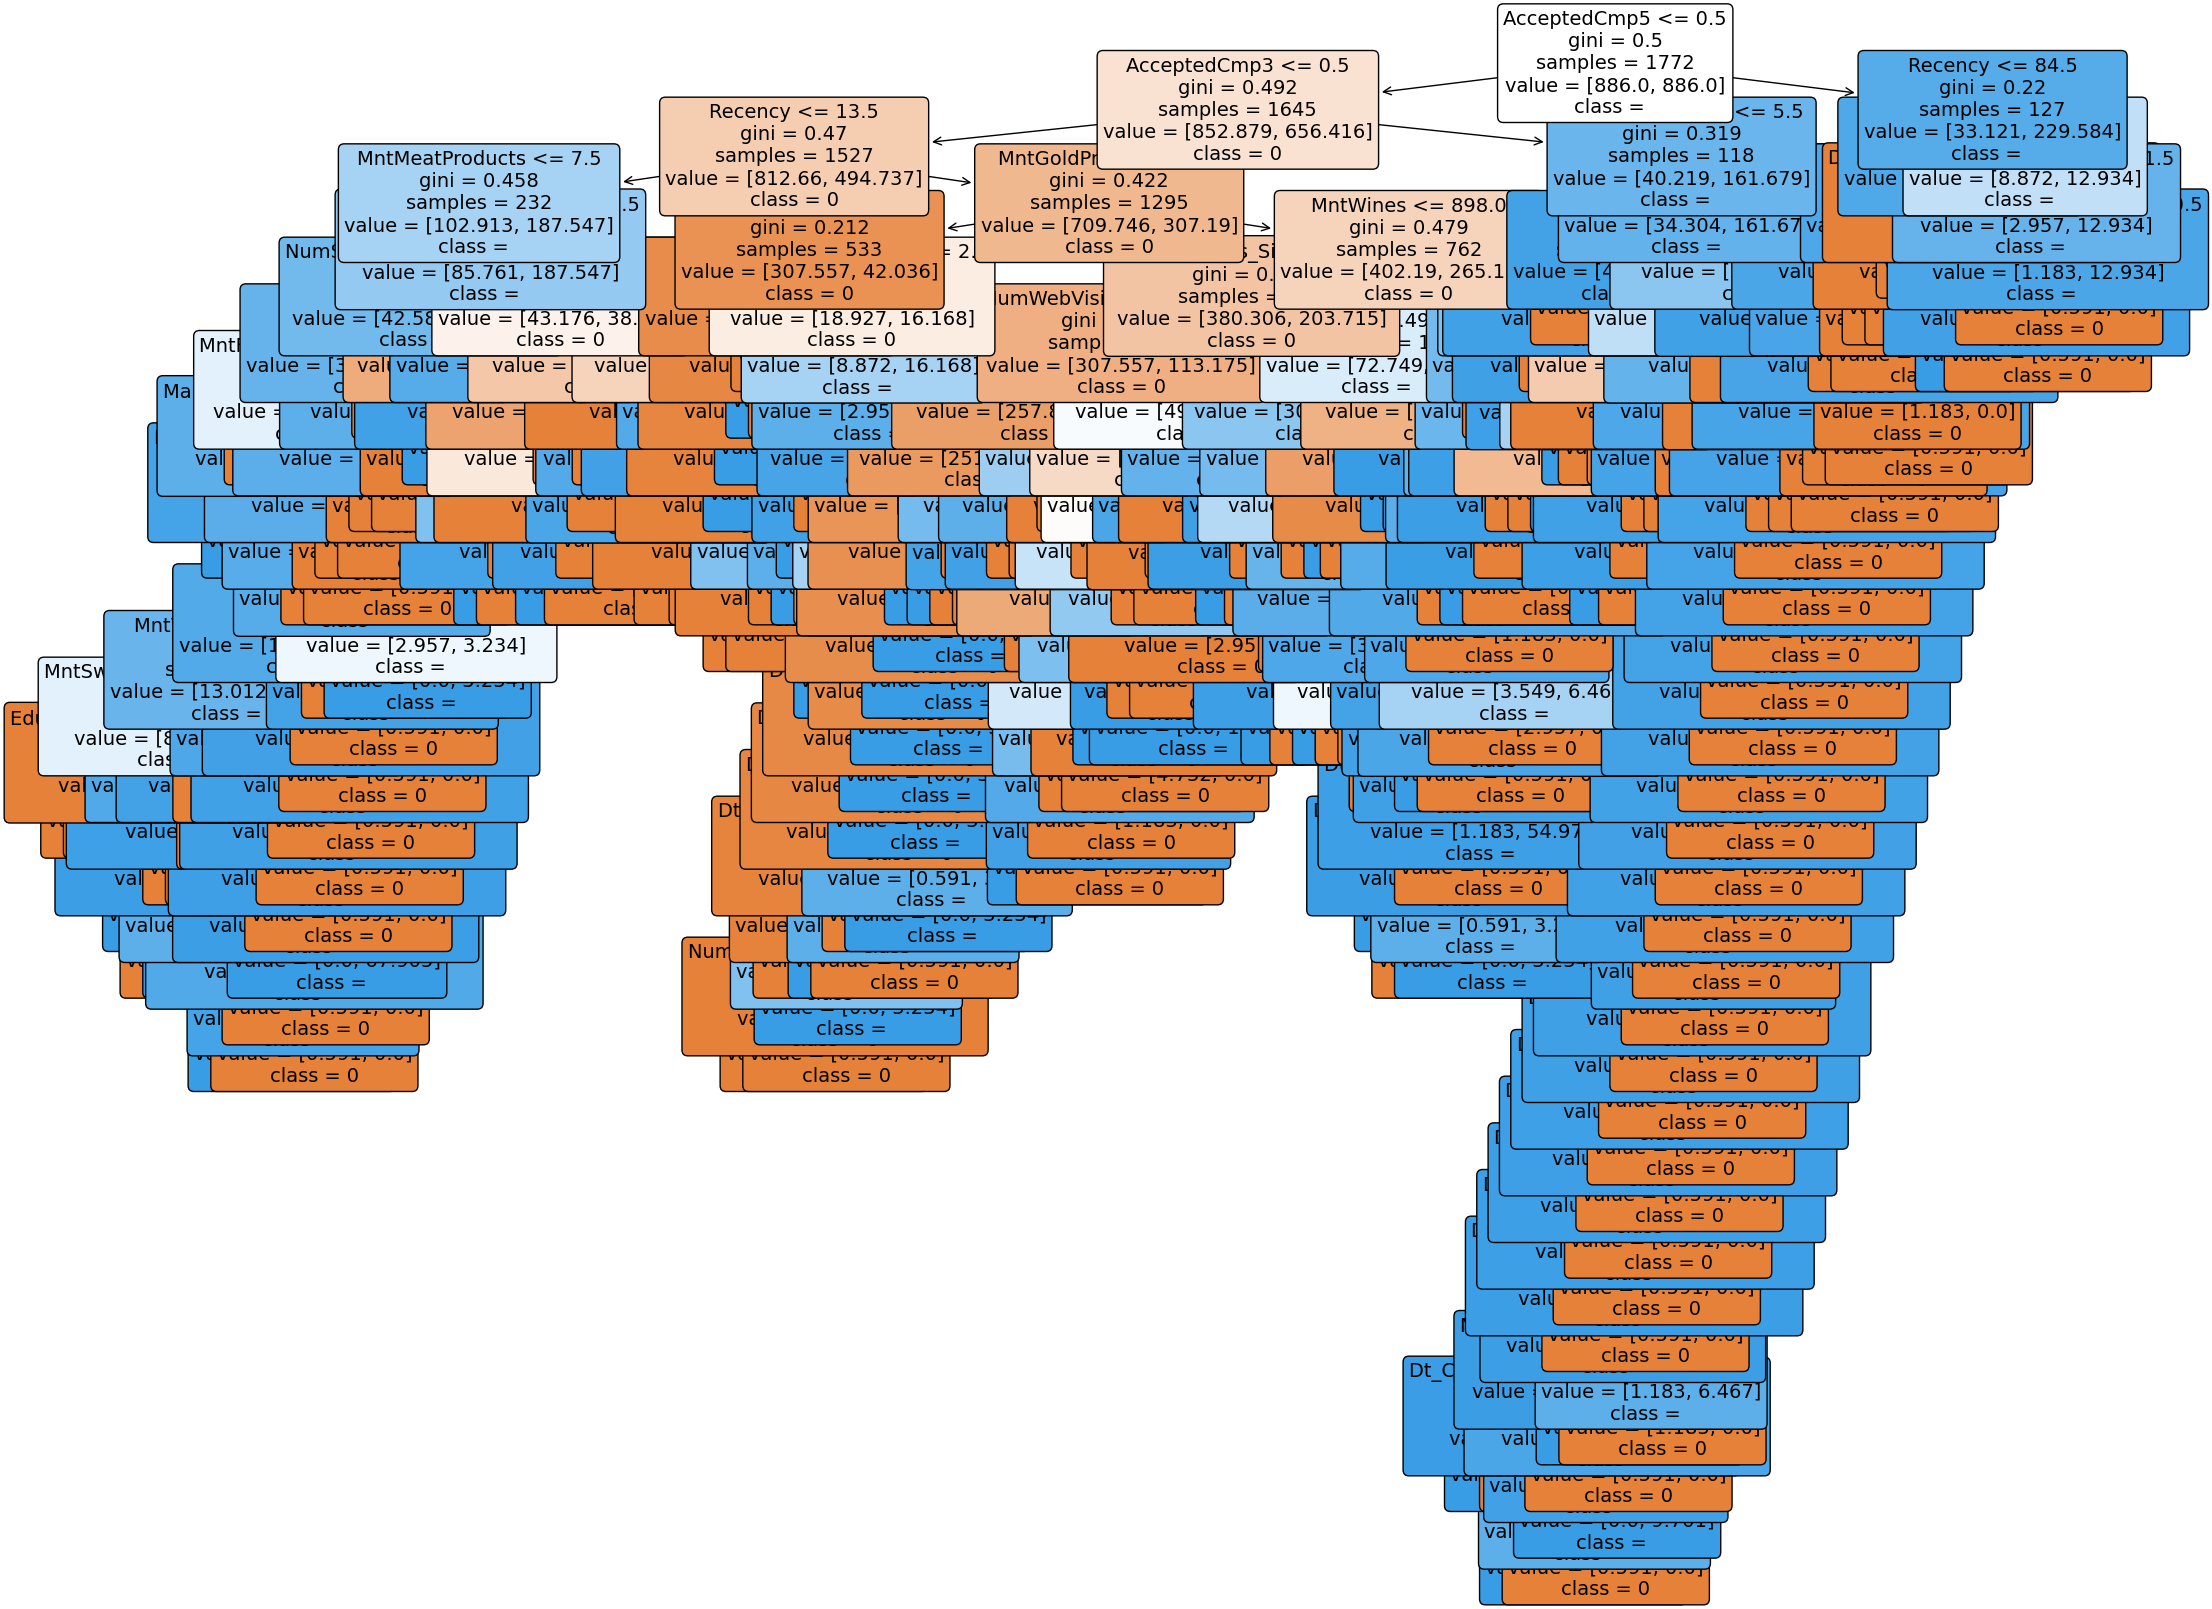

In [93]:
# Visualizing the decsion tree
fig2 = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_cw,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)

### Changing max depth of the decision tree

In [58]:
# Create Decision Tree classifer object
clf_md = DecisionTreeClassifier(max_depth = 20)

# Train Decision Tree Classifer
clf_md = clf_md.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_md = clf_md.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_md))
accuracy_md = metrics.accuracy_score(y_test, y_pred_md)*100
print("Accuracy:",accuracy_md)
confusion_matrix(y_test,y_pred_md)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       385
           1       0.50      0.47      0.49        59

    accuracy                           0.87       444
   macro avg       0.71      0.70      0.71       444
weighted avg       0.86      0.87      0.87       444

Accuracy: 86.71171171171171


array([[357,  28],
       [ 31,  28]])

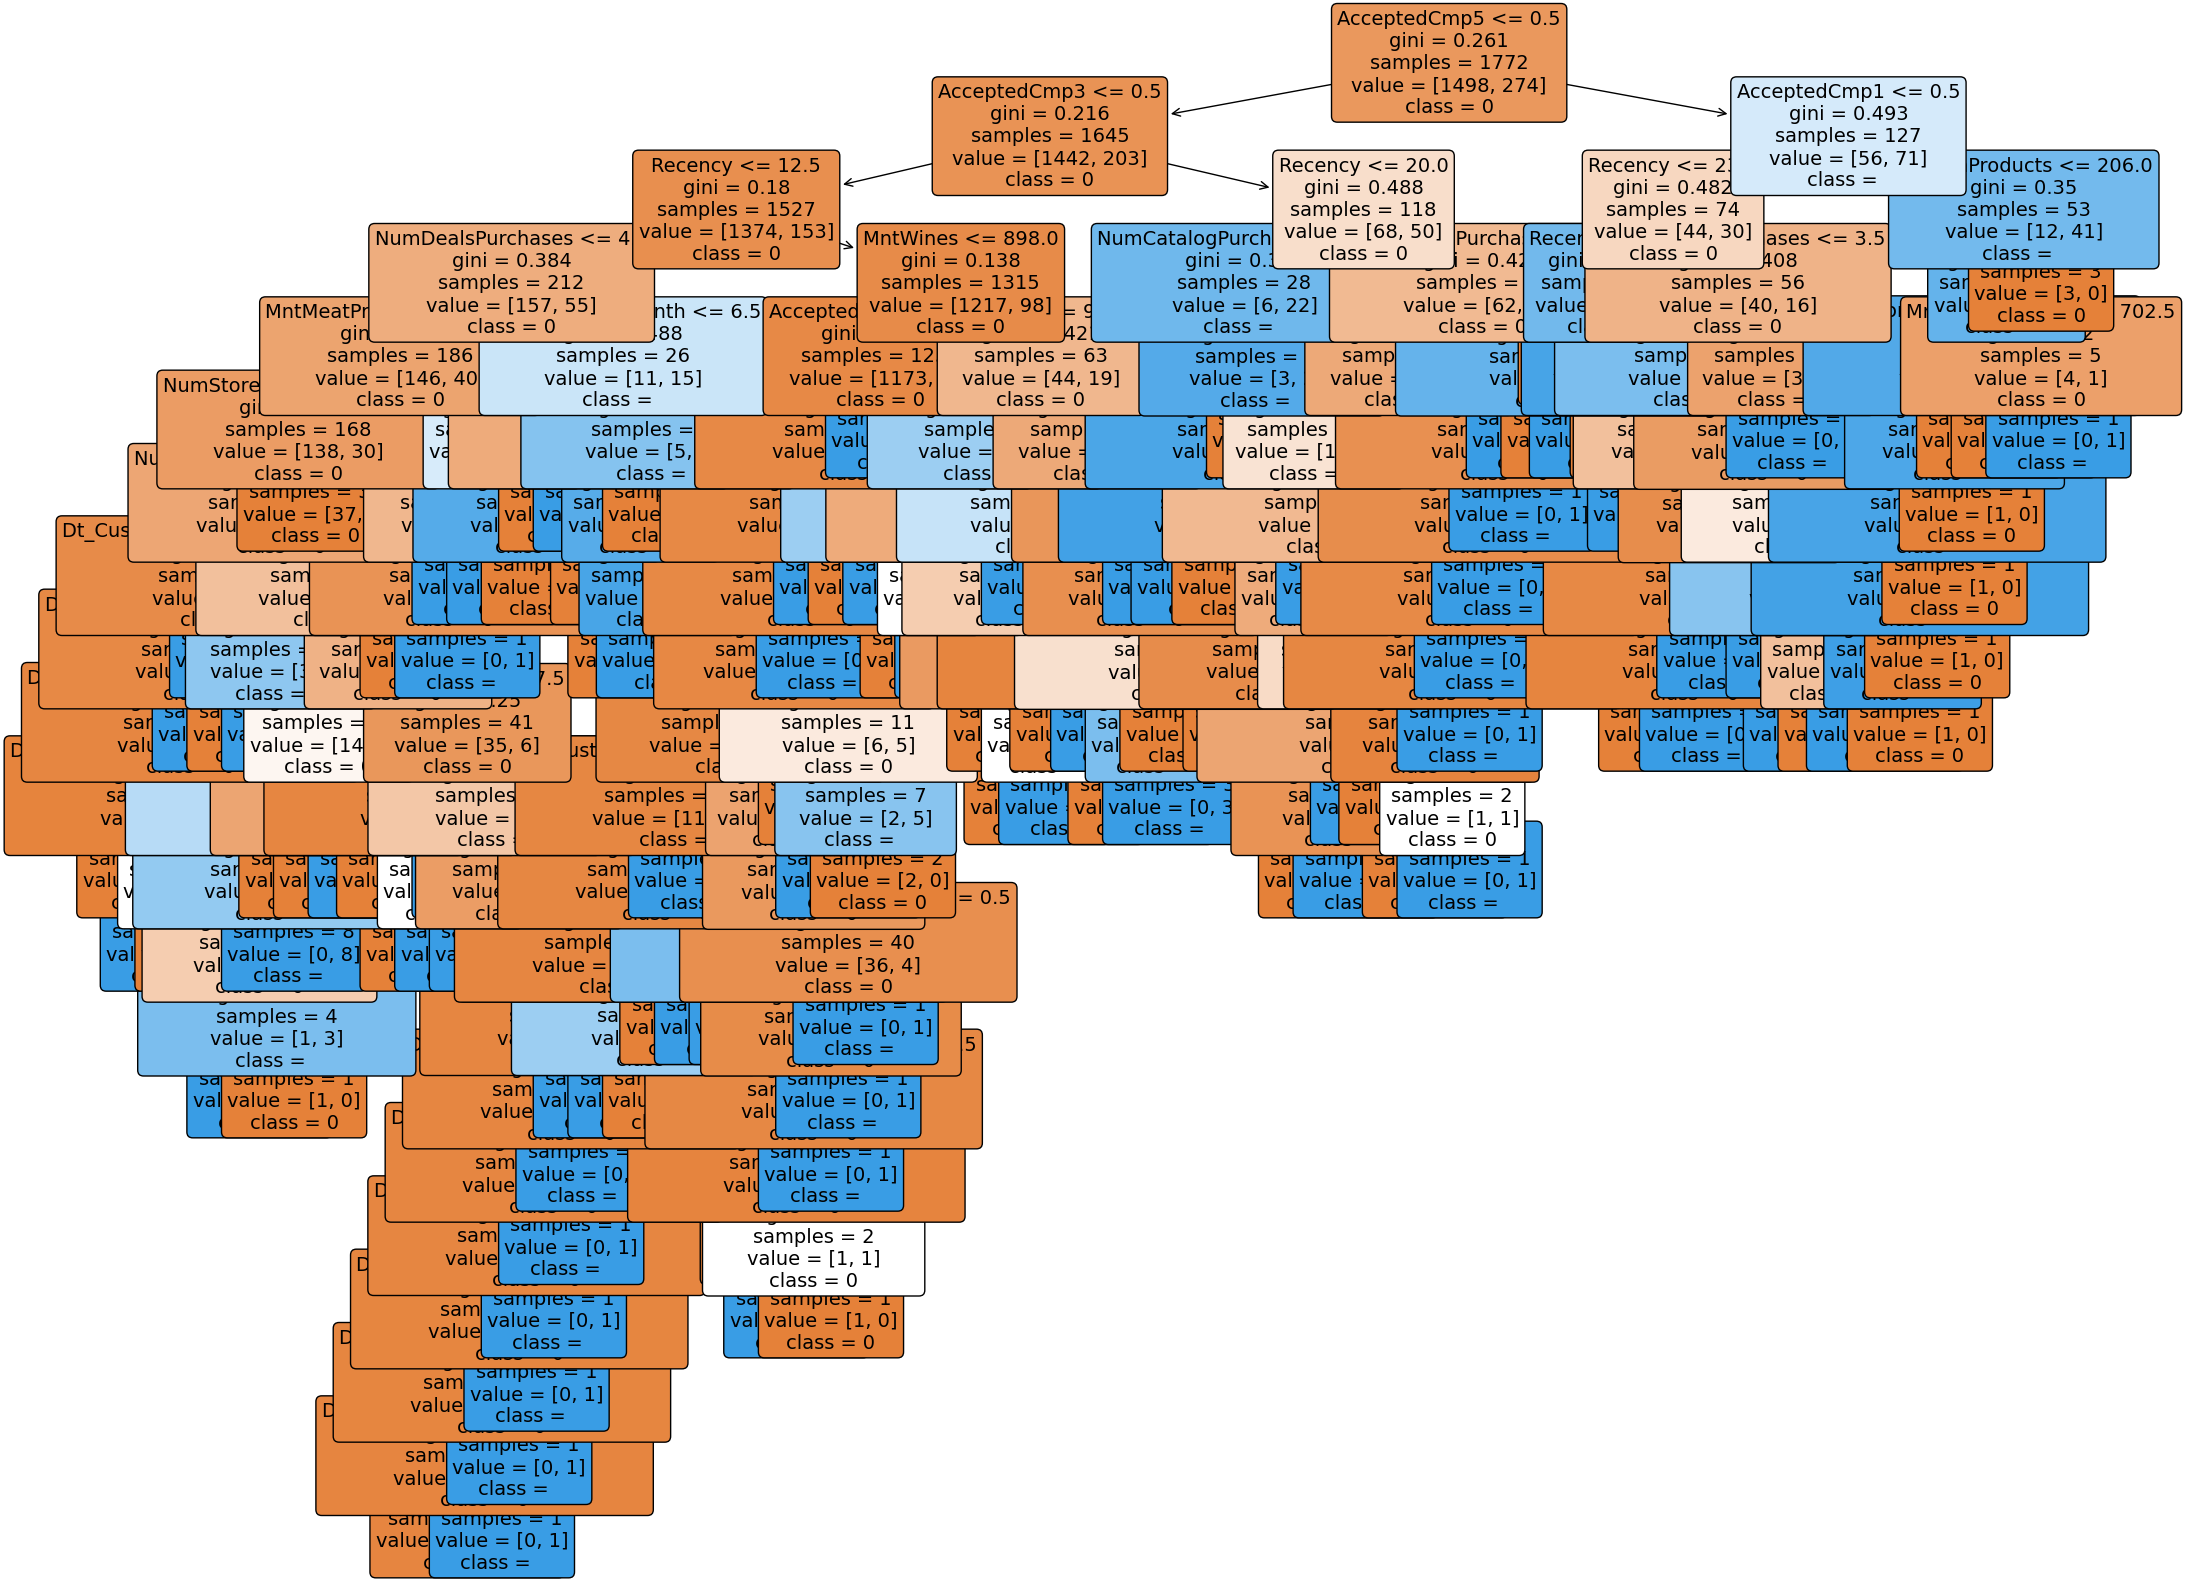

In [94]:
# Visualizing the decision tree
fig3 = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_md,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)

### Changing Splitter parameter of decision tree

In [59]:
# Create Decision Tree classifer object
clf_s = DecisionTreeClassifier(splitter = "random")

# Train Decision Tree Classifer
clf_s = clf_s.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_s = clf_s.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test,y_pred_s))
accuracy_s = metrics.accuracy_score(y_test, y_pred_s)*100
print("Accuracy:",accuracy_s)
confusion_matrix(y_test,y_pred_s)


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       385
           1       0.55      0.54      0.55        59

    accuracy                           0.88       444
   macro avg       0.74      0.74      0.74       444
weighted avg       0.88      0.88      0.88       444

Accuracy: 88.06306306306307


array([[359,  26],
       [ 27,  32]])

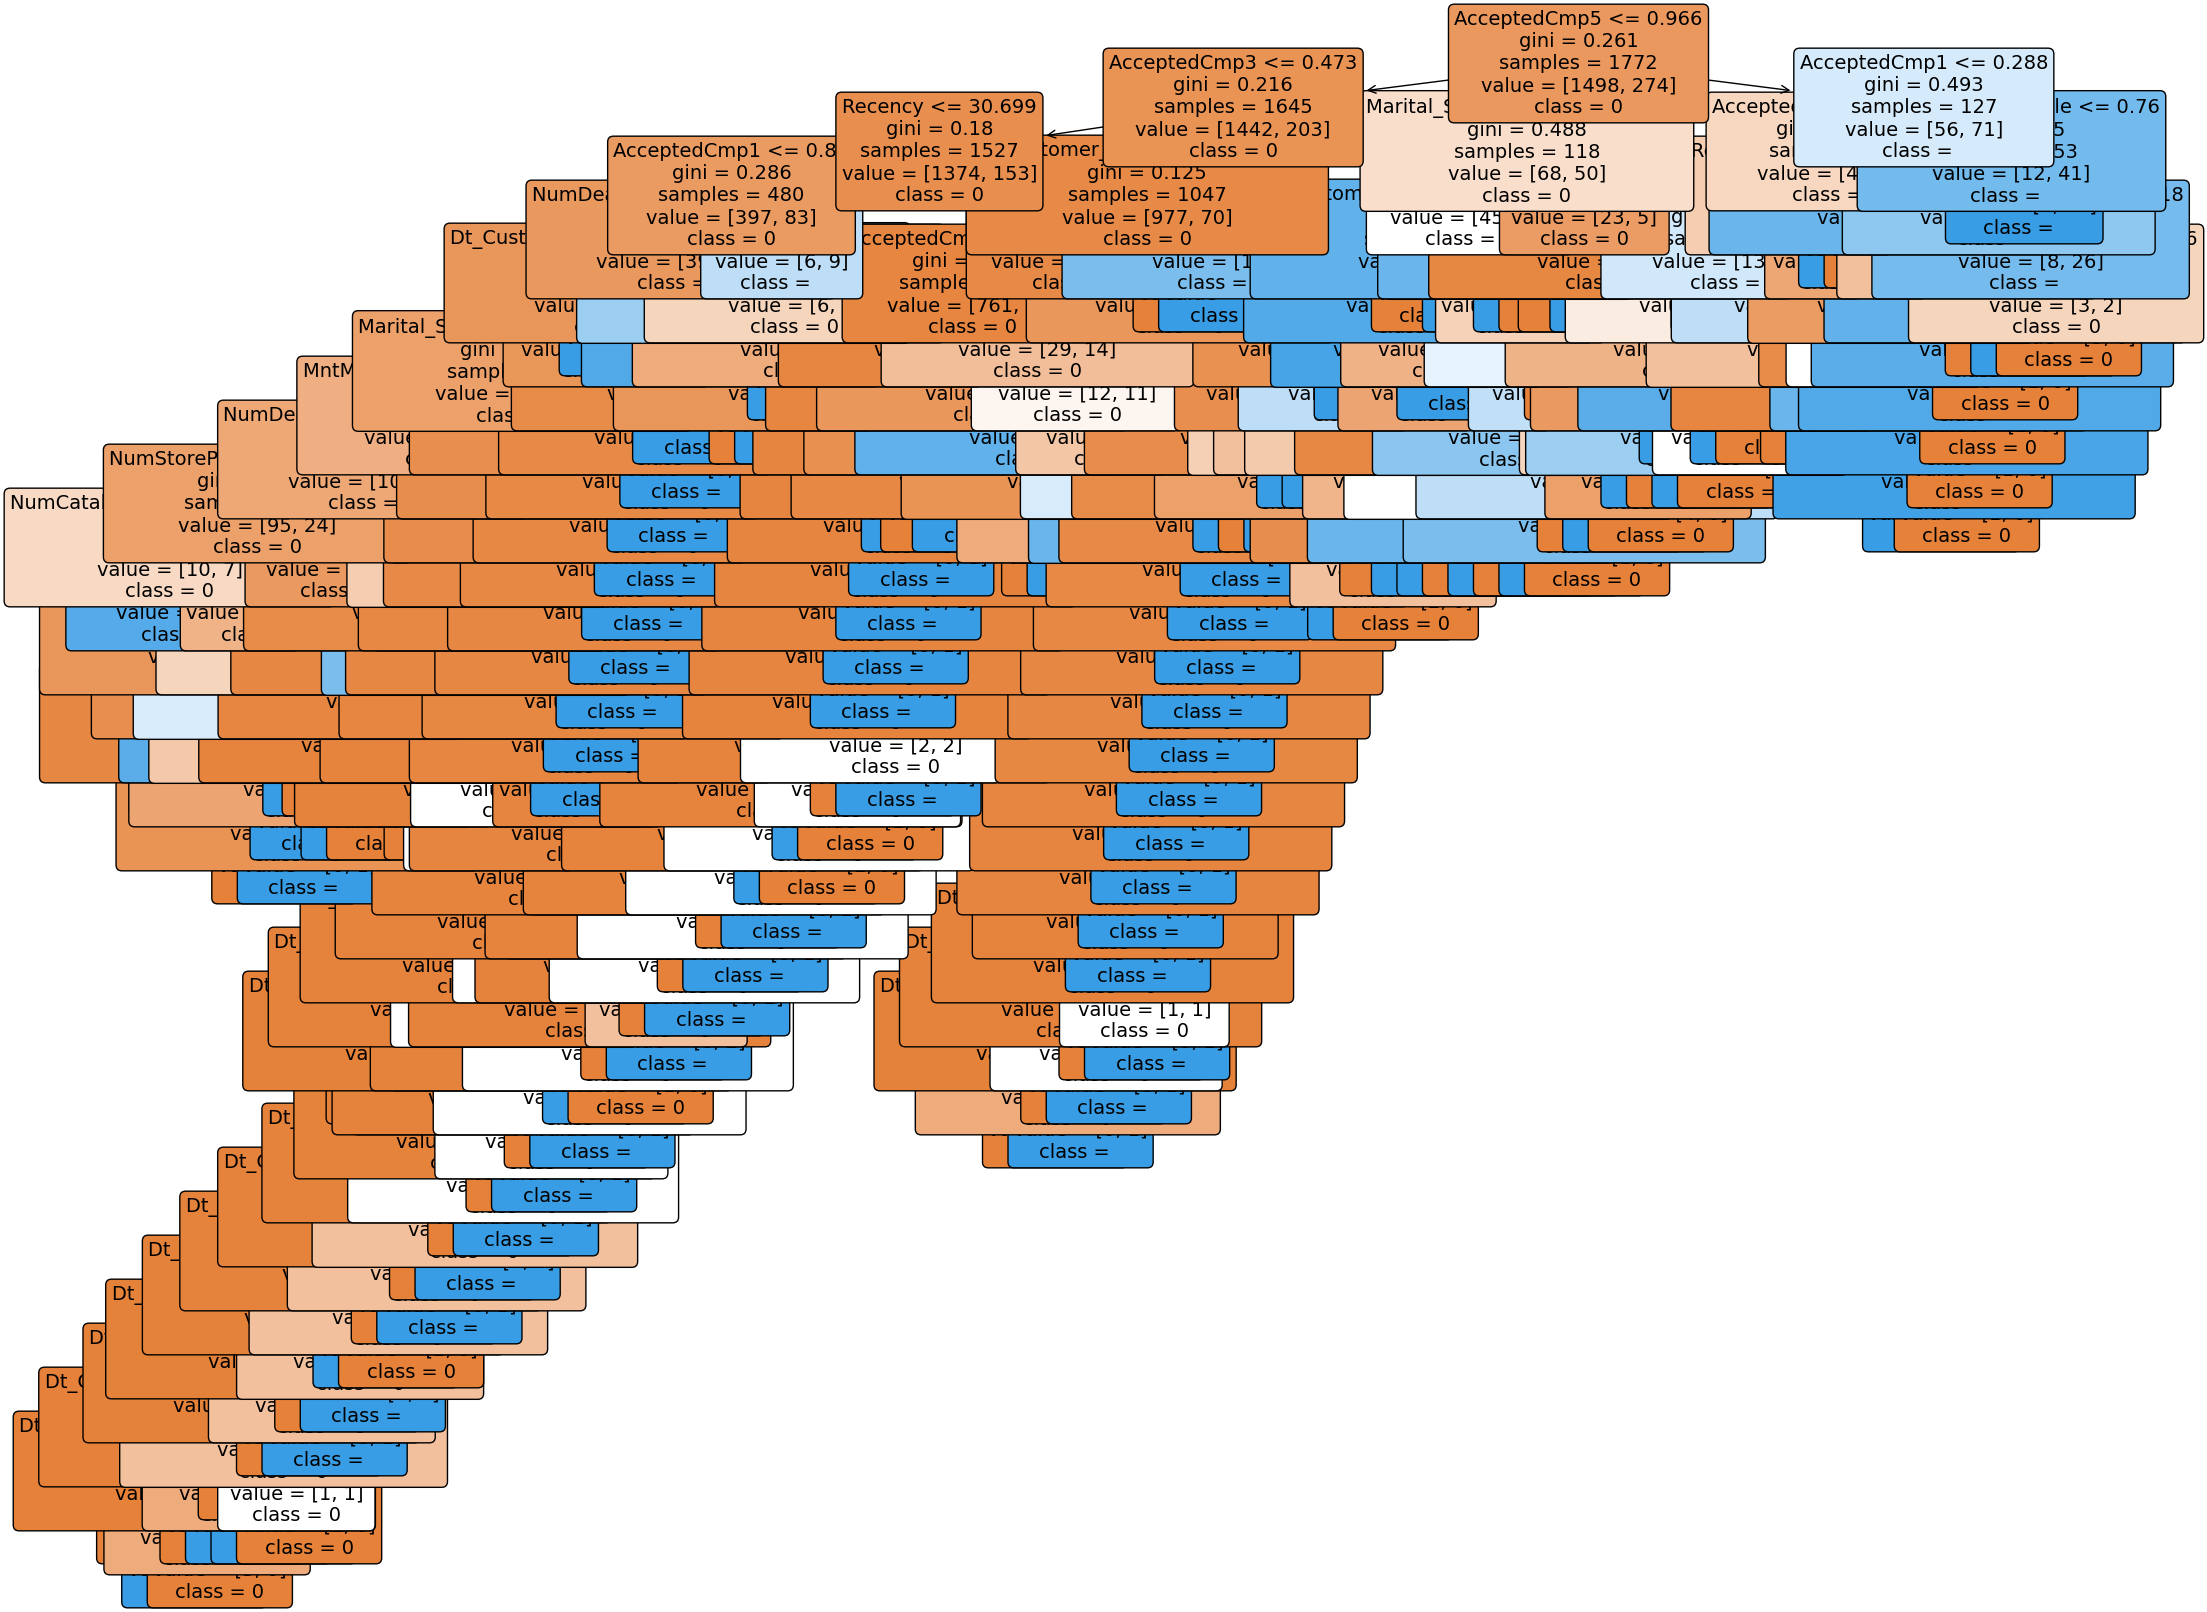

In [96]:
# Visualizing the decsiion tree
figs = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(clf_s,
                           feature_names=X.columns.tolist(),
                           class_names=str(target_names),
                           filled=True, 
                           rounded=True, 
                           fontsize=14)

## Improving the decision tree model using ensemble methods

### Random Forest

In [54]:
# Initialize and train random forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Evaluate performance on test set
accuracy_rf = clf_rf.score(X_test, y_test)*100
print("Accuracy:", accuracy_rf)

Accuracy: 87.83783783783784


### Gradient Boosting

In [55]:
# create Gradient Boosting classifier model
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# train the model on training data
clf_gb.fit(X_train, y_train)

# predict on test data
y_pred_gb = clf_gb.predict(X_test)

# evaluate the model's accuracy
accuracy_gb = clf_gb.score(X_test, y_test)*100
print("Accuracy:", accuracy_gb)

Accuracy: 89.86486486486487


## Visualization

"\nfig1.set_xlabel('Model')\nfig1.set_ylabel('Accuracy')\nfig1.set_title('Accuracy of differnt models')\n"

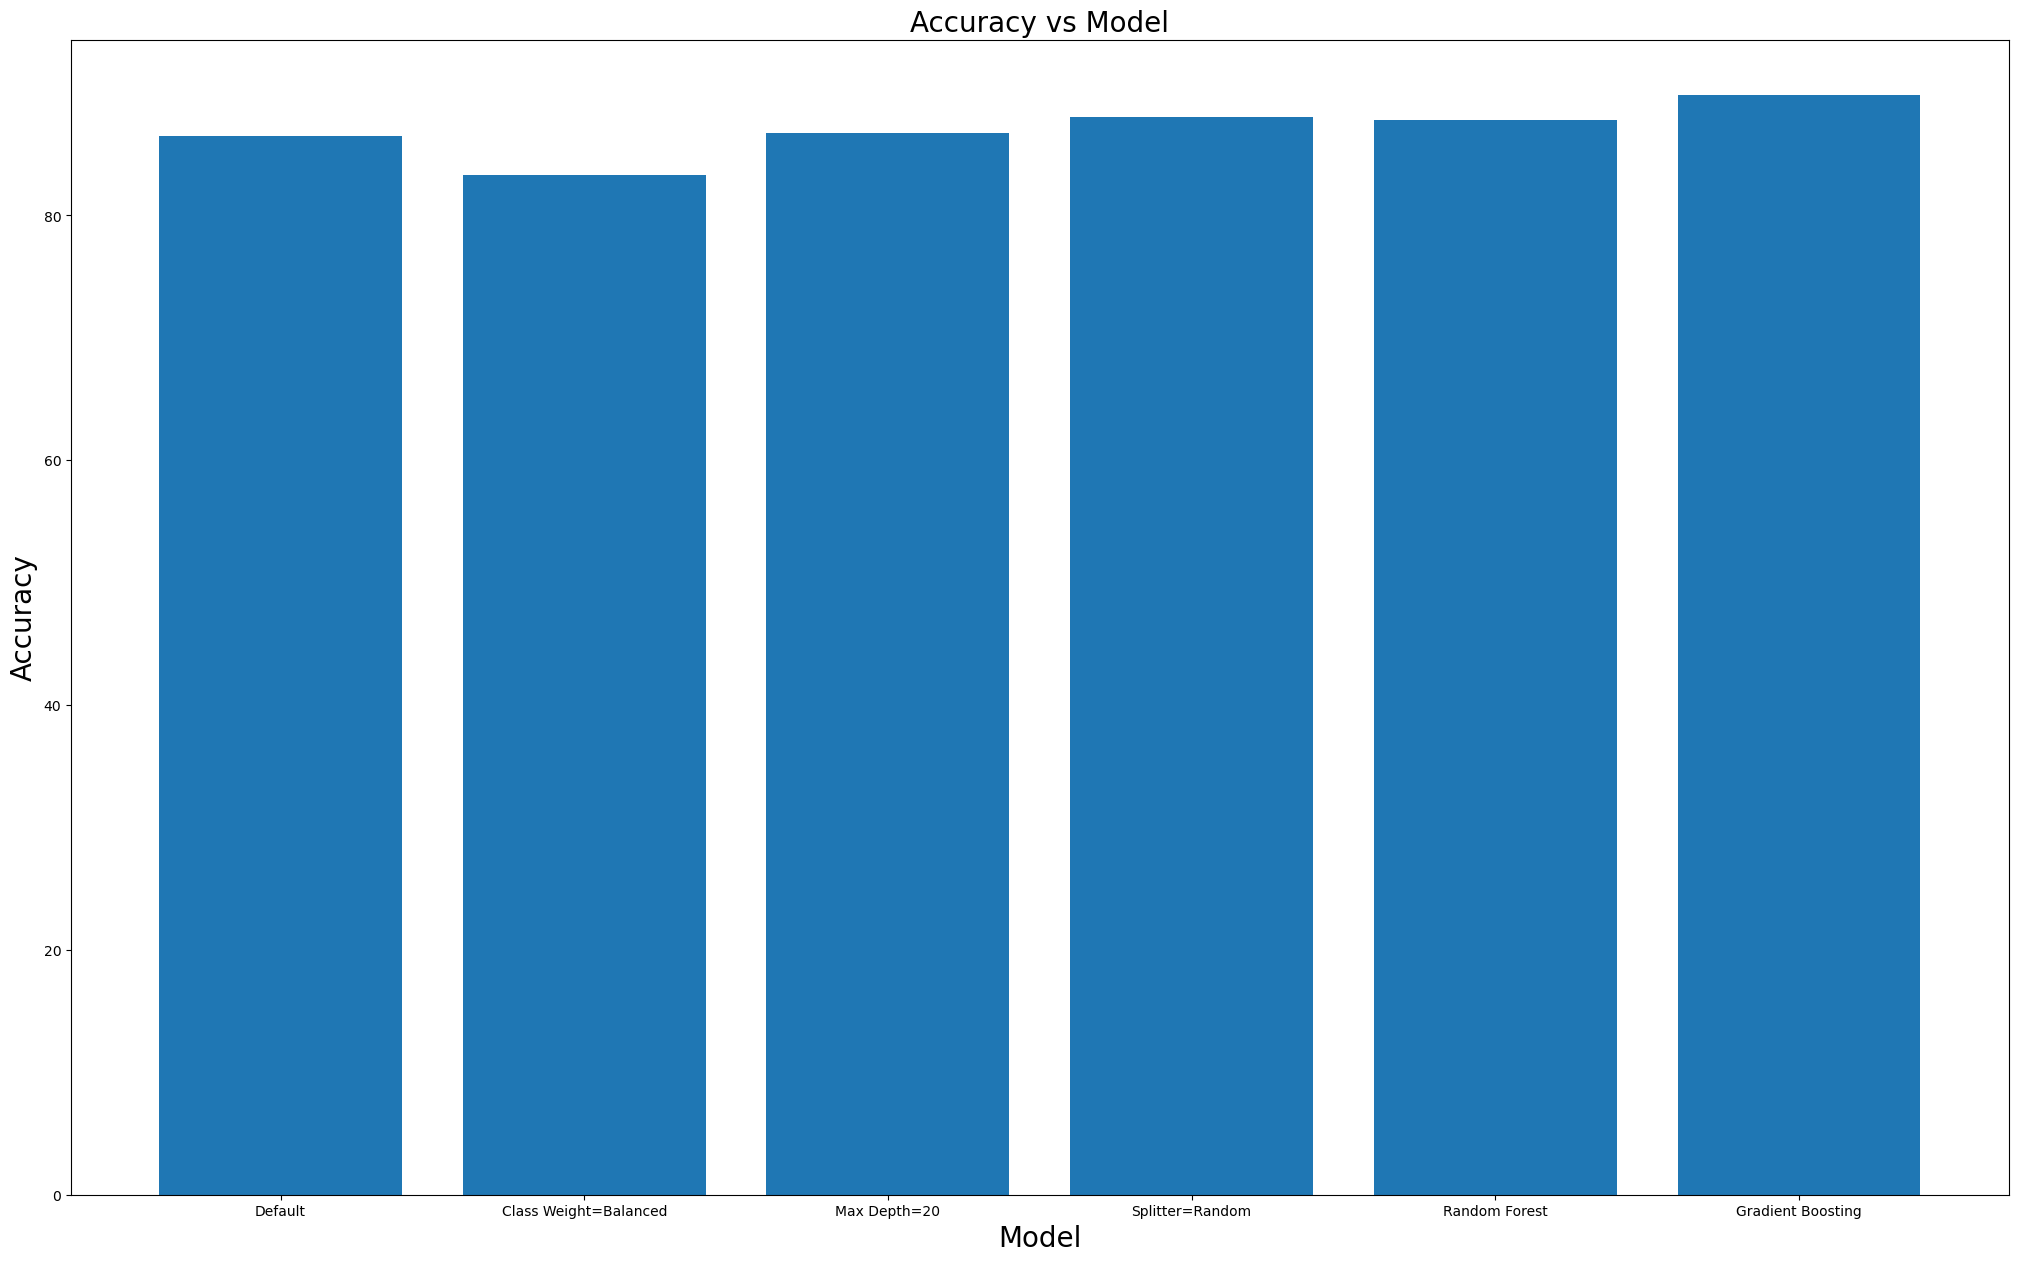

In [91]:
# Which model gives the best accuracy

Model = ['Default', 'Class Weight=Balanced', 'Max Depth=20', 'Splitter=Random', 'Random Forest', 'Gradient Boosting']
  
Accuracy = [accuracy_default, accuracy_cw, accuracy_md, accuracy_s, accuracy_rf, accuracy_gb]
  
list_of_tuples = list(zip(Model, Accuracy))

Model_accuracy = pd.DataFrame(list_of_tuples,
                  columns=['Model', 'Accuracy'])

Model_accuracy.head(6)

fig1 = plt.figure(figsize=(25,15))

plt.bar(data=Model_accuracy, x='Model', height='Accuracy',)

plt.title("Accuracy vs Model", fontsize=20)
plt.xlabel("Model", fontsize=20)

plt.ylabel("Accuracy", fontsize=20)

'''
fig1.set_xlabel('Model')
fig1.set_ylabel('Accuracy')
fig1.set_title('Accuracy of differnt models')
'''

## Perform Data Preprocessing

In [13]:
# Defining function to perform Label Encoding 
def Encoder(marketing_campaign_df):
    columnsToEncode = list(marketing_campaign_df.select_dtypes(include = ['object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            marketing_campaign_df[feature] = le.fit_transform(marketing_campaign_df[feature])
        except:
            print("error")
    return marketing_campaign_df

In [14]:
marketing_campaign_df = Encoder(marketing_campaign_df)

## Perform Standardization 

In [15]:
scaler = StandardScaler()
marketing_campaign_df_std = scaler.fit_transform(marketing_campaign_df)

marketing_campaign_df_std = pd.DataFrame(data = marketing_campaign_df_std,columns = marketing_campaign_df.columns)

## Building Model K-means Clustering

### Determine suitable value of K

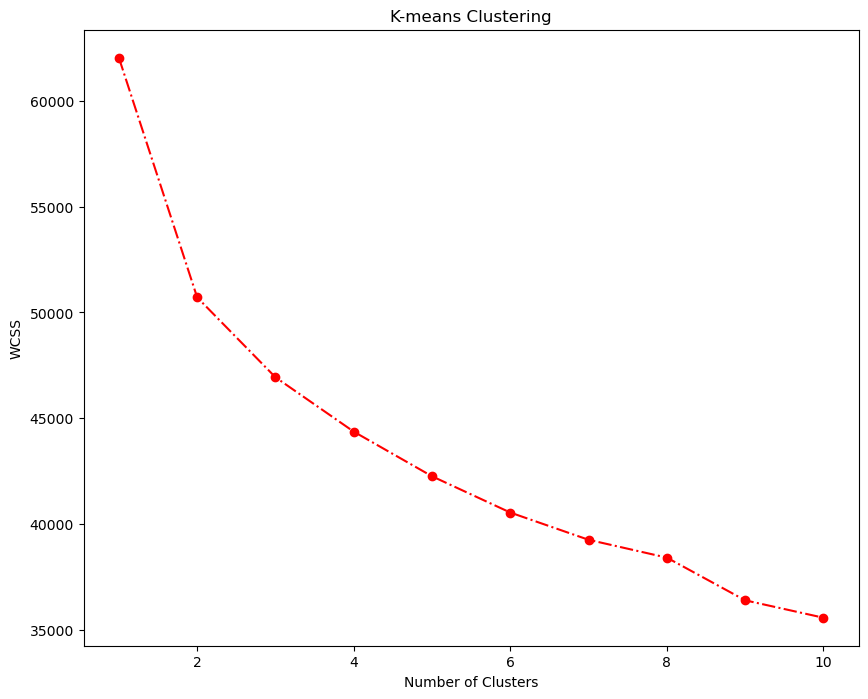

In [16]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(marketing_campaign_df_std)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

#### The slope is steep until k=2, after which the slope starts smoothening out. Thus we shall take k=2 for building our algorithm.

### Perform K-means Clustering

#### K-means initialization method: k-means++ ; K value = 2

In [17]:
kmeans_km_k2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

kmeans_km_k2.fit(marketing_campaign_df_std)

df_segm_kmeans_km_k2= marketing_campaign_df_std.copy()
marketing_campaign_df_std['Segment K-means_km__k2'] = kmeans_km_k2.labels_

df_segm_analysis_km_k2 = marketing_campaign_df_std.groupby(['Segment K-means_km__k2']).mean()
df_segm_analysis_km_k2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
Segment K-means_km__k2,,,,,,,,,,,,,,,,,,,,,
0,-0.002391,0.127816,-0.048934,-0.00556,-0.546128,0.491331,0.078848,0.017079,-0.002901,-0.616123,...,-0.020320,-0.15674,-0.280839,-0.239741,-0.103876,0.013002,0.0,0.0,-0.152271,-0.127816
1,0.003419,-0.182754,0.069967,0.00795,0.780868,-0.702518,-0.112738,-0.024420,0.004148,0.880948,...,0.029054,0.22411,0.401550,0.342788,0.148525,-0.018590,0.0,0.0,0.217720,0.182754


/Users/poojasadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


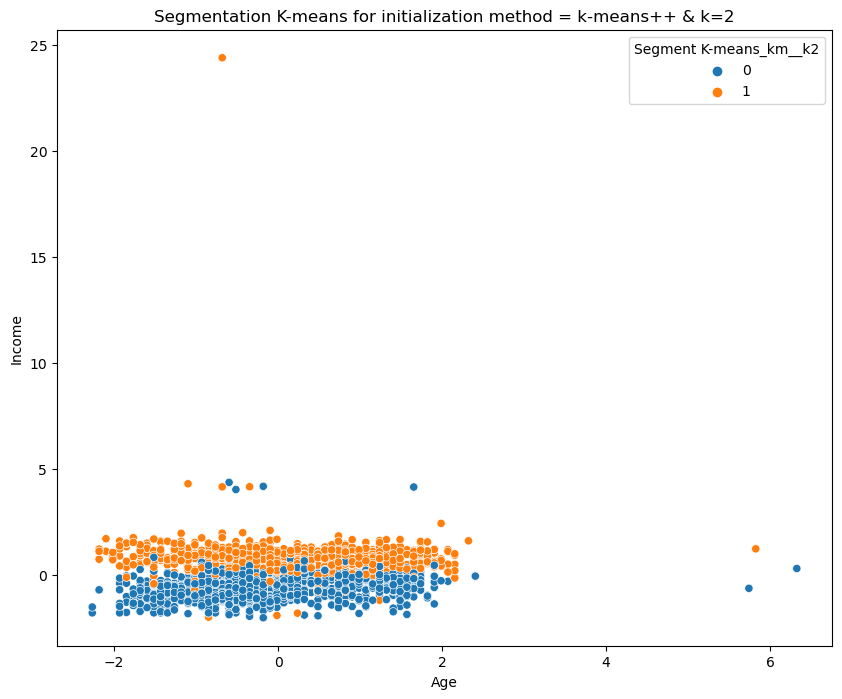

In [18]:
### PLot visualization
#x_axis = marketing_campaign_df_std['Age']
#y_axis = marketing_campaign_df_std['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot('Age', 'Income', data = marketing_campaign_df_std, hue = marketing_campaign_df_std['Segment K-means_km__k2'])
plt.title('Segmentation K-means for initialization method = k-means++ & k=2')
plt.show()

In [20]:
silhouette_scores_km_k2 = silhouette_score(marketing_campaign_df_std, kmeans_km_k2.labels_)
silhouette_scores_km_k2

0.21630206799966964

### Change K value and perform k-means clustering

#### K-means initialization method: k-means++ ; K value = 3

In [22]:
kmeans_km_k3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

kmeans_km_k3.fit(marketing_campaign_df_std)

df_segm_kmeans_km_k3= marketing_campaign_df_std.copy()
marketing_campaign_df_std['Segment K-means_km_k3'] = kmeans_km_k3.labels_

df_segm_analysis_km_k3 = marketing_campaign_df_std.groupby(['Segment K-means_km_k3']).mean()
df_segm_analysis_km_k3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Segment K-means_km__k2
Segment K-means_km_k3,,,,,,,,,,,,,,,,,,,,,
0,-0.022136,-0.521851,0.239841,-0.024354,0.235420,-0.472811,0.795822,0.015925,-0.017576,0.434864,...,0.236279,-0.226219,-0.145546,0.005885,0.016328,0.0,0.0,-0.146429,0.521851,0.546603
1,0.006266,0.320927,-0.123278,-0.011991,-0.698547,0.703212,-0.143563,0.020503,-0.000742,-0.775767,...,-0.260190,-0.280839,-0.257650,-0.100148,0.023856,0.0,0.0,-0.145630,-0.320927,0.000982
2,0.013510,0.006422,-0.046588,0.048890,0.994867,-0.737309,-0.632934,-0.054782,0.021029,0.910552,...,0.204087,0.759452,0.627290,0.173849,-0.061276,0.0,0.0,0.426444,-0.006422,1.000000


/Users/poojasadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


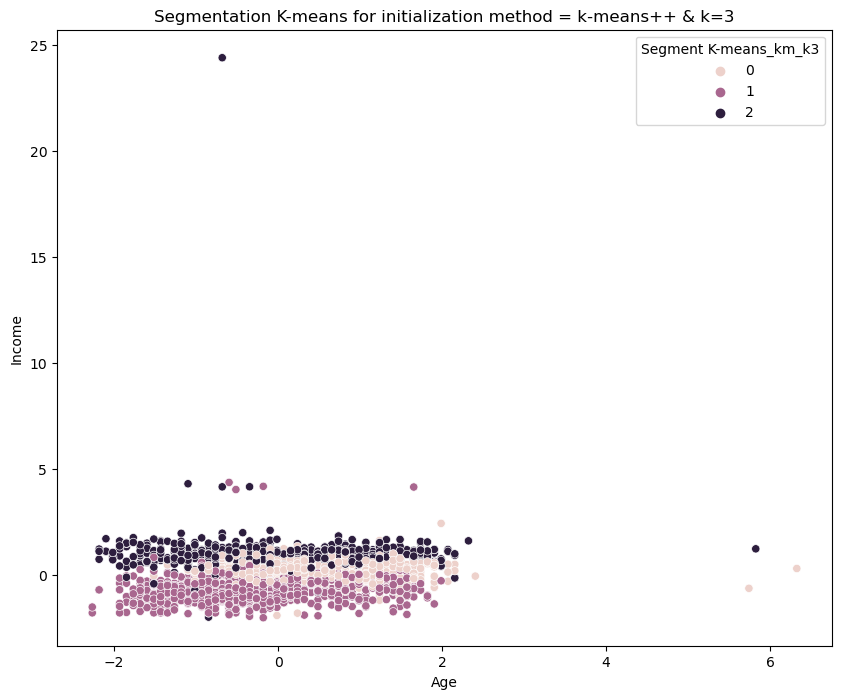

In [23]:
### PLot visualization
#x_axis = marketing_campaign_df_std['Age']
#y_axis = marketing_campaign_df_std['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot('Age', 'Income', data = marketing_campaign_df_std, hue = marketing_campaign_df_std['Segment K-means_km_k3'])
plt.title('Segmentation K-means for initialization method = k-means++ & k=3')
plt.show()

In [24]:
# Metrics
silhouette_scores_km_k3 = silhouette_score(marketing_campaign_df_std, kmeans_km_k3.labels_)
silhouette_scores_km_k3

0.15858666108459515

In [86]:
kmeans_km_k4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

kmeans_km_k4.fit(marketing_campaign_df_std)

df_segm_kmeans_km_k4= marketing_campaign_df_std.copy()
marketing_campaign_df_std['Segment K-means_km_k4'] = kmeans_km_k4.labels_

df_segm_analysis_km_k4 = marketing_campaign_df_std.groupby(['Segment K-means_km_k4']).mean()
df_segm_analysis_km_k4

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Segment K-means_km_k=2,Segment K-means_km__k2,Segment K-means_km_k2,Segment K-means_km_k3
Segment K-means_km_k4,,,,,,,,,,,,,,,,,,,,,
0,0.000591,0.275541,-0.116289,-0.016473,-0.677258,0.672988,-0.117868,0.020282,0.016480,-0.767123,...,-0.100759,0.029252,0.0,0.0,-0.155522,-0.275541,0.000000,0.000000,0.000000,0.000000
1,0.004471,0.058678,0.115293,0.008549,1.176058,-0.724411,-0.691109,-0.094127,0.017246,1.703168,...,0.951795,-0.037097,0.0,0.0,1.209174,-0.058678,1.000000,1.000000,1.000000,1.952941
2,0.016411,-0.035317,-0.111454,0.065565,0.879916,-0.731632,-0.533880,-0.040829,0.020230,0.556413,...,-0.117148,-0.025465,0.0,0.0,0.069858,0.035317,1.000000,1.000000,1.000000,1.934579
3,-0.014962,-0.508595,0.268511,-0.021565,0.246709,-0.488234,0.837114,0.021458,-0.051588,0.502489,...,-0.009366,-0.024349,0.0,0.0,-0.126739,0.508595,0.558719,0.558719,0.558719,1.000000


/Users/poojasadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


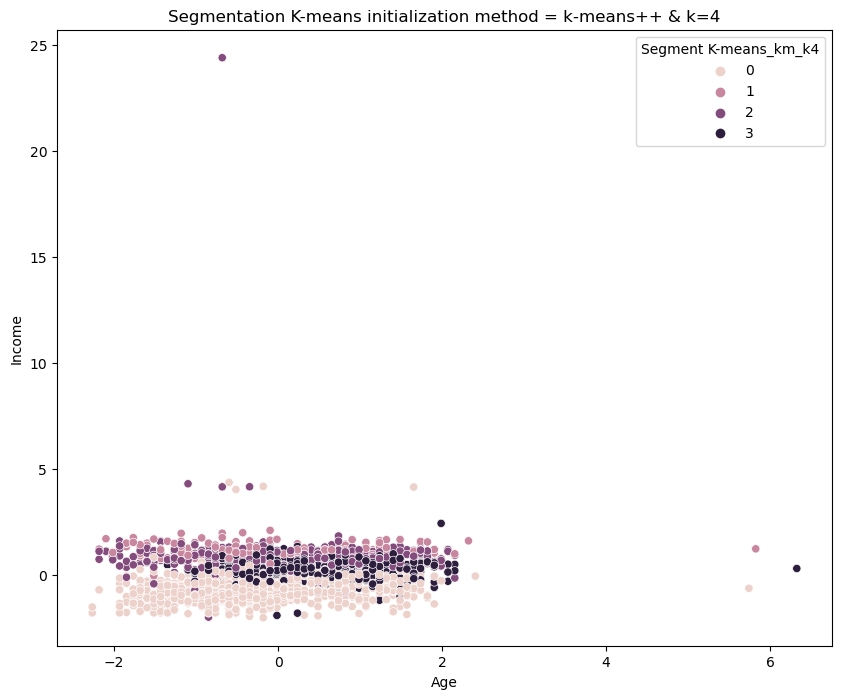

In [87]:
### PLot visualization
#marketing_campaign_df_std['Age'] = 2021 - marketing_campaign_df_std['Year_Birth']
#x_axis = marketing_campaign_df_std['Age']
#y_axis = marketing_campaign_df_std['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot('Age', 'Income', data = marketing_campaign_df_std, hue = marketing_campaign_df_std['Segment K-means_km_k4'])
plt.title('Segmentation K-means initialization method = k-means++ & k=4')
plt.show()

Change initialization value and perform k-means clustering